## Convexity test
In this notebook we shall see that the function $q(\alpha, \beta) = \sum_{x,a} \alpha_{x,a} \log \frac{\alpha_{x,a}/ \sum_{a'}\alpha_{x,a'}}{\beta_{x,a}/ \sum_{a'}\beta_{x,a'}}$ is not convex for any pair of distributions $(\alpha,\beta)$ over $X\times A$, where $X$ and $A$ are some finite spaces.

One can prove 
$q(\alpha, \beta) = \underbrace{\sum_{x,a} \alpha_{x,a} \log \frac{\alpha_{x,a}}{\beta_{x,a}}}_{f(\alpha,\beta)} - \underbrace{\sum_{x} \|\alpha_{x,*}\|_1 \log \frac{\|\alpha_{x,*}\|_1}{\|\beta_{x,*}\|_1}}_{g(\alpha,\beta)}$

Since convexity of a generic function $h$ requires the following condition to hold   $D_h(x,y,\lambda) = \lambda h(x) + (1-\lambda) h(y) - h(\lambda x + (1-\lambda)y),\forall \lambda\in[0,1]$, then we just need to verify $D(f,x,y,\lambda)- D_g(x,y,\lambda)\geq 0, \forall \lambda \in[0,1]$.

As shown here, there are some examples for which $q$ does not satisfy this condition, thus it is not convex (but it's the difference of two convex functions).

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# Copyright (c) 2021 Alessio Russo [alessior@kth.se]. All rights reserved.
#
# This file is part of PrivacyStochasticSystems.
#
# PrivacyStochasticSystems is free software: you can redistribute it and/or modify
# it under the terms of the MIT License. You should have received a copy of
# the MIT License along with PrivacyStochasticSystems.
# If not, see <https://opensource.org/licenses/MIT>.
#

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': [16, 4]})

In [2]:
def calcq(x0, x1):
    q = 0
    for x in range(2):
        for a in range(2):
            q+= x1[x,a] * np.log((x1[x,a] * np.sum(x0[x,:])) / (x0[x,a] * np.sum(x1[x,:])))
    return q

def calcf(x0, x1):
    f = 0
    for x in range(2):
        for a in range(2):
            f+= x1[x,a] * np.log(x1[x,a]/x0[x,a])
    return f

def calcg(x0, x1):
    g = 0
    for x in range(2):
        g += np.sum(x1[x,:]) * np.log(np.sum(x1[x,:])/np.sum(x0[x,:]))
    return g

def calcD(x0, x1, y0, y1, lmbd):
    z1 = lmbd*x1 + (1-lmbd)*y1
    z0 = lmbd*x0 + (1-lmbd)*y0
    return lmbd * calcq(x0, x1) + (1-lmbd) * calcq(y0, y1) - calcq(z0, z1)

def make_plot(x0, x1, y0, y1):
    f,g = calcf(x0, x1), calcg(x0, x1)
    fp,gp = calcf(y0, y1), calcg(y0, y1)

    DQ = []
    DF = []
    DG = []
    LMBD = np.linspace(0,1, 50)
    for lmbd in LMBD:
        Df = lmbd * f + (1-lmbd) *fp - calcf(lmbd*x0 + (1-lmbd)*y0, lmbd*x1 + (1-lmbd)*y1)
        Dg = lmbd * g + (1-lmbd) *gp - calcg(lmbd*x0 + (1-lmbd)*y0, lmbd*x1 + (1-lmbd)*y1)
        Dq = calcD(x0, x1, y0, y1, lmbd)
        DQ.append((Df-Dg))
        DF.append(Df)
        DG.append(Dg)
        
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].plot(LMBD, DQ)
    ax[0].set_xlabel(r'$\lambda$', fontsize=14)
    ax[0].set_title(r'$D_q(x,y,\lambda)$', fontsize=14)
    ax[0].grid()

    ax[1].plot(LMBD, DF)
    ax[1].set_xlabel(r'$\lambda$', fontsize=14)
    ax[1].set_title(r'$D_f(x,y,\lambda)$', fontsize=14)
    ax[1].grid()

    ax[2].plot(LMBD, DG)
    ax[2].set_xlabel(r'$\lambda$', fontsize=14)
    ax[2].set_title(r'$D_g(x,y,\lambda)$', fontsize=14)
    ax[2].grid()
    fig.tight_layout()
    plt.show()


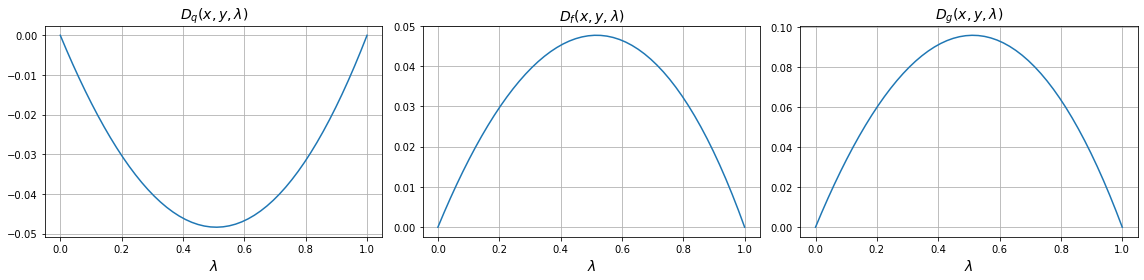

In [3]:
x1 = [[0.5704, 0.0206],
      [0.1980, 0.2110]]
x0 = [[0.1312, 0.1403],
      [0.3757, 0.3529]]

y1 = [[0.2891, 0.0753],
      [0.5033, 0.1322]]
y0 = [[0.1031, 0.3591],
      [0.3672, 0.1706]]

x1 = np.array(x1/np.sum(x1))
x0 = np.array(x0/np.sum(x0))

y1 = np.array(y1/np.sum(y1))
y0 = np.array(y0/np.sum(y0))

make_plot(x0, x1, y0, y1)

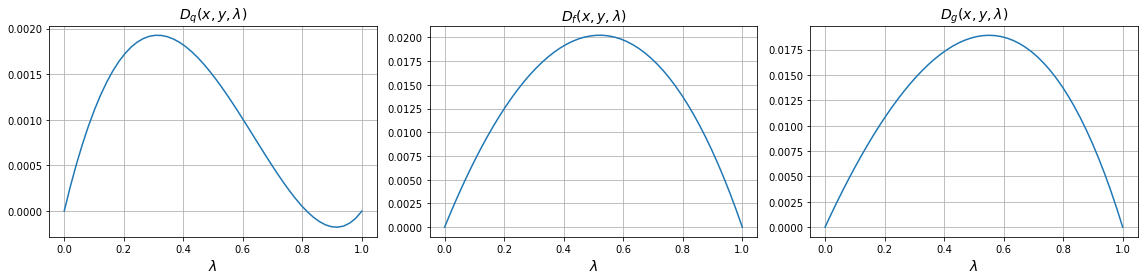

In [4]:
x1 = [[0.2110, 0.3764],
      [0.3246, 0.0881]]
x0 = [[0.4428, 0.3469],
      [0.0297, 0.1805]]


y1 = [[0.1935, 0.3282],
      [0.4342, 0.0441]]
y0 = [[0.3474, 0.2314],
      [0.0416, 0.3796]]

x1 = np.array(x1/np.sum(x1))
x0 = np.array(x0/np.sum(x0))

y1 = np.array(y1/np.sum(y1))
y0 = np.array(y0/np.sum(y0))

make_plot(x0, x1, y0, y1)